## 오차역전파법
오차역전파법(backpropagation): 가중치 매개변수의 기울기를 효율적으로 계산

오차를 역(반대 방향)으로 전파하는 방법(backward propagation of errors)


### 5.1 계산 그래프
계산 그래프(computational graph): 계산 과정을 그래프로 나타낸 것

복수의 노드(node)와 에지(edge)로 표현됨.

에지: 노드 사이의 직선

#### 5.1.1 계산 그래프로 풀다
계산 그래프를 이용한 문제풀이는 다음 흐름으로 진행

계산 그래프를 구성한다.
그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.
순전파: 계산을 왼쪽에서 오른쪽으로 진행. 계산 그래프의 출발점부터 종착점으로의 전파.

#### 5.1.2 국소적 계산
국소적: 자신과 직접 관련된 작은 범위

국소적 계산: 자신과 관계된 정보만으로 다음 결과를 출력할 수 있음

각 노드는 자신과 관련된 계산 외에는 아무 것도 신경 쓸게 없음

복잡한 계산을 '단순하고 국소적 계산'으로 분할하고 계산 결과를 다음 노드로 전달

복잡한 계산도 분해하면 단순한 계산으로 구성됨

#### 5.1.3 왜 계산 그래프로 푸는가?
역전파를 통해 '미분'을 효율적으로 계산할 수 있음

중간까지 구한 미분 결과를 공유할 수 있어 다수의 미분을 효율적으로 계산할 수 있음

### 5.2 연쇄법칙
'국소적 미분'을 전달하는 원리는 연쇄 법칙(chain rule)에 따른 것

#### 5.2.1 계산 그래프의 역전파
계산 그래프의 역전파: 순방향과는 반대 방향으로 국소적 미분을 곱한다.

역전파의 계산 절차는 신호 E에 노드의 국소적 미분을 곱한 후 다음 노드로 전달

역전파의 계산 순에 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있음



#### 5.2.2 연쇄법칙이란?
합성 함수: 여러 함수로 구성된 함수

##### 식 5.1

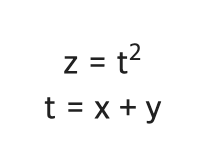

연쇄법칙은 함성 함수의 미분에 대한 성질

합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

##### 식 5.2

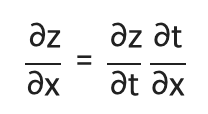

x에 대한 z의 미분은 t에 대한 z의 미분과 x에 대한 t의 미분의 곱으로 나타낼 수 있음

∂t를 서로 지울 수 있음

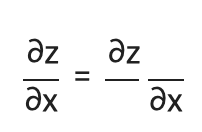

##### 식 5.3

식 5.1에 대한 국소적 미분(편미분)을 구함

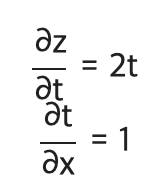

최종적으로 구하고 싶은 x에 대한 z의 미분은 다음 두 미분을 곱해 계산

##### 식 5.4

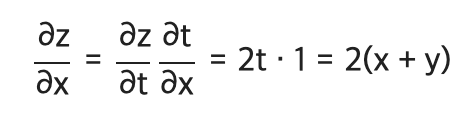

#### 5.2.3 연쇄법칙과 계산 그래프
계산 그래프의 역전파는 오른쪽에서 왼쪽으로 신호를 전파

노드로 들어온 입력신호에 그 노드의 국소적 미분(편미분)을 곱한 후 다음 노드로 전달

역전파가 하는 일은 연쇄 법칙의 원리와 같음.

### 5.3 역전파

#### 5.3.1 덧셈 노드의 역전파
z = x + y 의 미분. 다음은 해석적으로 계산


##### 식 5.5

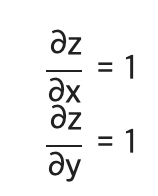

덧셈 노드의 역전파는 1을 곱하기만 할 뿐 입력된 값을 그대로 다음 노드로 보내게 됨.

#### 5.3.2 곱셈 노드의 역전파

z = xy 의 미분

##### 식 5.6

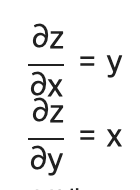

곱셈 노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보냄

순전파 때 x 였다면 역전파에서는 y. 순전파 때 y 였다면 역전파에서는 x로 바꿈

#### 5.3.3 사과 쇼핑의 예

### 5.4 단순한 계층 구현하기

계산 그래프의 곱셈 노드를 'MultiLayer', 덧셈 노드를 'AddLayer'로 구현

#### 5.4.1 곱셈 계층

모든 계층은 forward() 순전파, backward() 역전파 라는 공통의 메서드(인터페이스)를 갖도록 수현

곱셈 계층을 MultiLayer 클래스로 다음처럼 구현

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y # x와 y를 바꾼다.
        dy = dout * self.x 
        
        return dx, dy

__init__() : 인스턴스 변수인 x와 y를 초기화. 순전파 시 입력 값을 유지하기 위해 사용.

forward() : x와 y를 인수로 받고 두 값을 곱해 반환

backward() : 상류에서 넘어온 미분(dout)에 순전파 때 값을 '서로 바꿔' 곱한 후 하류로 흘림.

MultiLayer를 사용하여 순전파 구현

In [2]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) # 220

220.00000000000003


각 변수에 대한 미분은 backward()로 구할 수 있음

In [3]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax) # 2.2 110 200

2.2 110.00000000000001 200


backward() 호출 순서는 forward() 때와 반대

backward()가 받는 인수는 '순전파의 출력에 대한 미분'

#### 5.4.2 덧셈 계층

모든 계층은 forward() 순전파, backward() 역전파 라는 공통의 메서드(인터페이스)를 갖도록 수현

덧셈 계층을 MultiLayer 클래스

In [5]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

__init__() : pass를 통해 아무 일도 하지 않음

forward() : x와 y를 인수로 받고 두 값을 더해 반환

backward() : 상류에서 넘어온 미분(dout)을 그대로 하류로 흘림

그림 5-17의 계산 그래프 파이썬 구현

In [6]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price)) # 715
print("dApple:", dapple) # 2.2
print("dApple_num:", int(dapple_num)) # 110
print("dOrange:", dorange) # 3.3
print("dOrange_num:", int(dorange_num)) # 165
print("dTax:", dtax) # 650

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


### 5.5 활성화 함수 계층 구현하기

활성화 함수인 ReLU와 Sigmoid 계층을 구현

#### 5.5.1 ReLU 계층

##### 식 5.7 ReLU 식

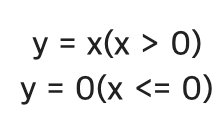

##### 식 5.8 ReLU x에 대한 y 미분 식

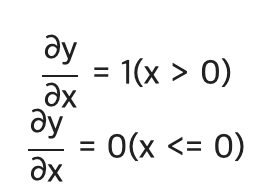

순전파 때 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘림

순전파 때 x가 0 이하면 역전파 때는 하류로 신호를 보내지 않음

ReLU 계층을 구현한 코드

In [8]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
        
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

Relu 클래스는 mask 인스턴스 변수를 가짐

mask는 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외(0보다 큰 원소)는 False로 유지

In [9]:
import numpy as np
x = np.array([[1.0, 0.5], [-2.0, 3.0]])
print(x)

[[ 1.   0.5]
 [-2.   3. ]]


In [10]:
mask = (x <= 0)
print(mask)

[[False False]
 [ True False]]


In [11]:
out = x.copy()
out[mask] = 0
out

array([[1. , 0.5],
       [0. , 3. ]])

ReLU 계층은 전기 회로의 '스위치'에 비유

순전파 때 전류가 흐르고 있으면 스위치를 ON, 흐르지 않으면 OFF

역전파 때 스위치가 ON이라면 전류가 그대로 흐르고, OFF면 더 이상 흐르지 않음

#### 5.5.2 Sigmoid 계층

##### 식 5.9 시그모이드 함수

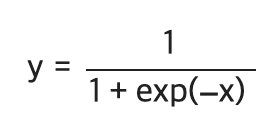

1단계 '/' 노드, y = 1 / x를 미분하면 다음식이 됨

##### 식 5.10

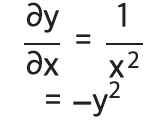

역전파 때는 상류의 예측값에 -y**2 을 곱해서 하류로 전달

2단계 상류의 값을 여과 없이 하류로 보냄

3단계 y = exp(x) 연산을 수행

##### 식 5.11

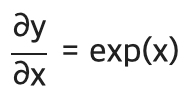

계산 그래프에서는 상류의 순전파 때의 출력(exp(-x))을 곱해 하류로 전파

4단계 y = exp(x) 연산을 수행

'X' 노드, 순전파 때의 값을 서로 바꿔 곱함. 이 예에서는 -1을 곱함

시그모이드 간소화버전

노드를 그룹화하여 Sigmoid 계층의 세세한 내용을 노출하지 않고 입력과 출력에만 집중

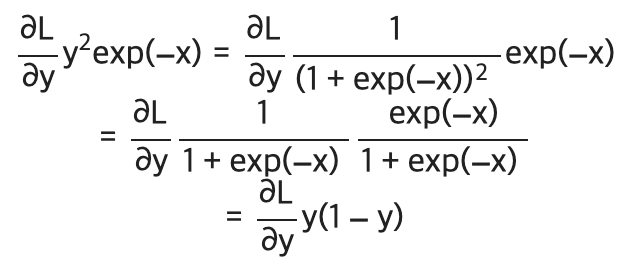

Sigmoid 계층의 계산 그래프: 순전파의 출력 y만으로 역전파를 계산

Sigmoid 계층을 파이썬으로 구현

In [12]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
        
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

### 5.6 Affine/Softmax 계층 구현하기

#### 5.6.1 Affine 계층

신경망의 순전파에서는 가중치 신호의 총합을 계산하기 위해 행렬의 내적(np.dot())을 사용

In [13]:
X = np.random.rand(2)   # 입력
W = np.random.rand(2,3) # 가중치
B = np.random.rand(3)   # 편향

print(X.shape) # (2,)
print(W.shape) # (2, 3)
print(B.shape) # (3,)

Y = np.dot(X, W) + B

(2,)
(2, 3)
(3,)


X와 W의 내적은 대응하는 차원의 원소 수를 일치 시켜야 함

어파인 변환(affine transformation): 신경망의 순전파 때 수행하는 행렬의 내적. 기하학 용어

이 계산 그래프는 '행렬'이 흐름



##### 식 5.13 행렬을 사용한 역전파 전개식

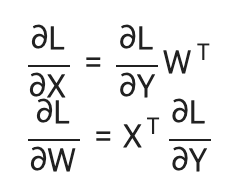

전치행렬 : W의 (i,j) 위치의 원소를 (j,i) 위치로 변경

##### 식 5.14 전치행렬 수식

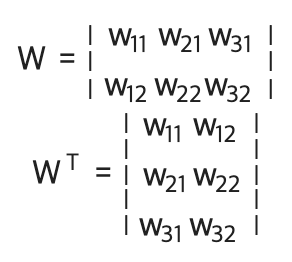

W의 형상이 (2,3) 이면 W.T의 형상은 (3,2)

##### 그림 5.25 Affine 계층의 역전파: 역전파에서의 변수 형상은 해당 변수명 옆에 표기

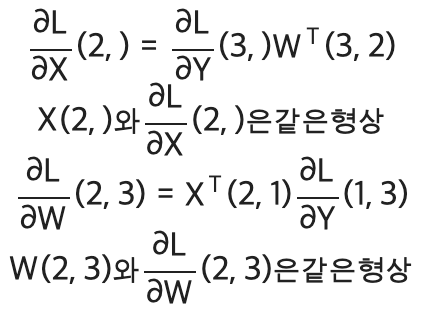

#### 5.6.2 배치용 Affine 계층

##### 그림 5-27 배치용 Affine 계층의 계산 그래프

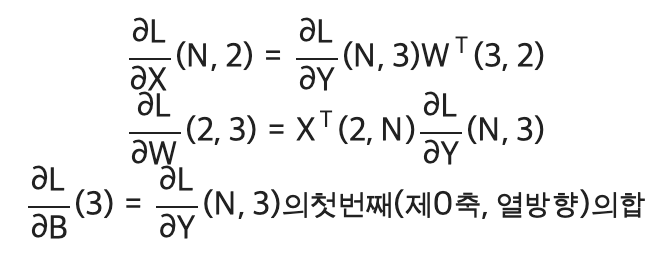

기존과 다른 부분은 입력인 X의 형상이 (N,2)가 됨

예를 들어 N=2(데이터가 2개)로 한 경우, 편향은 그 두 데이터 각각에 더해집니다.

In [14]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [15]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

순전파의 편향 덧셈은 각각의 데이터(1번째 데이터, 2번째 데이터)에 더해짐

역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 함

In [17]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

np.sum()에서 0번째 축(데이터를 단위로 한 축)에 대해서 (axis=0)의 총합을 구함

Affine 구현

common/layer.py 파일의 Affine 구현은 입력 데이터가 텐서(4차원 데이터)인 경우도 고려. 다음 구현과 약간 차이가 있음.

In [19]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

#### 5.6.3 Softmax-with-Loss 계층

소프트맥스 함수는 입력 값을 정규화하여 출력

추론할 때는 일반적으로 Softmax 계층을 사용하지 않음

점수(score): Softmax 앞의 Affine 계층의 출력

신경망을 학습할 때는 Softmax 계층이 필요

소프트맥스 계층 구현: 손실 함수인 교차 엔트로피 오차도 포함하여 'Softmax-with-Loss 계층'이라는 이름으로 구현

Softmax 계층: 입력 (a1, a2, a3)를 정규화하여 (y1, y2, y3)를 출력

Cross Entropy 계층: Softmax의 출력(y1, y2, y3)과 정답 레이블(t1, t2, t3)를 받고, 손실 L을 출력

Softmax 계층의 역전파는 (y1-t1, y2-t2, y3-t3)로 말끔한 결과임

Softmax 계층의 출력과 정답 레이블의 차분.

신경망의 역전파에서는 이 차이인 오차가 앞 계층에 전해지는 것

소프트맥스 함수의 손실 함수로 교차 엔트로피 오차를 사용하니 역전파가 (y1-t1, y2-t2, y3-t3)로 말끔히 떨어짐

=> 교차 엔트로피 함수가 그렇게 설계되었기 때문

항등 함수의 손실 함수로 '평균 제곱 오차'를 사용하면 역전파의 결과가 말끔히 떨어짐

구체적인 예

정답 레이블 (0, 1, 0), 소프트맥스 계층이 (0.3, 0.2, 0.5)를 출력

=> 소프트맥스 계층의 역전파는 (0.3, -0.8, 0.5)라는 커다란 오차를 전파

정답 레이블 (0, 1, 0), 소프트맥스 계층이 (0.01, 0.99, 0)을 출력

=> 소프트맥스 계층의 역전파가 보내는 오차는 (0.01, -0.01, 0)이 됨. 학습하는 정도가 작아짐

Softmax-with-Loss 계층을 구현한 코드

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 4.2.2. 교차 엔트로피 오차 참고
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 벡터)
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

주의. 역전파 때는 전파하는 값을 배치의 수(batch_size)로 나눠 데이터 1개당 오차를 앞 계층으로 전파함

### 5.7 오차역전파법 구현하기

#### 5.7.1 신경망 학습의 전체 그림

전제

학습: 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정

1단계 - 미니배치

미니배치: 훈련 데이터 중 일부를 무작위로 가져옴

목표: 미니배치의 손실 함수 값을 줄이기

2단계 - 기울기 산출

가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시

3단계 - 매개변수 갱신

가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4단계 - 반복

1~3 단계를 반복

오차역전법이 등장하는 단계는 두 번째인 '기울기 산출'

느린 수치 미분과 달리 기울기를 효율적이고 빠르게 구할 수 있음

#### 5.7.2 오차역전파법을 적용한 신경망 구현하기

계층을 사용함으로써

인식 결과를 얻는 처리(predict())와 기울기를 구하는 처리(gradient()) 계층의 전파만으로 동작이 이루어짐.

In [22]:
import numpy as np
from collections import OrderedDict

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()                                           
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1']) 
        self.layers['Relu1'] = Relu()                                         
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2']) 

        self.lastLayer = SoftmaxWithLoss()                                    
        
    def predict(self, x):
        for layer in self.layers.values():                                    
            x = layer.forward(x)                                              
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)                      

        # backward
        dout = 1                             
        dout = self.lastLayer.backward(dout) 
        
        layers = list(self.layers.values())  
        layers.reverse()                     
        for layer in layers:                 
            dout = layer.backward(dout)      

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

순전파 때는 추가한 순서대로 각 계층의 forward() 메서드를 호출

역전파 때는 계층을 반대 순서로 호출

신경망의 구성 요소를 '계층'으로 구현한 덕분에 신경망을 쉽게 구축

=> 레고 블록을 조립하듯 필요한 만큼 계층을 더 추가하면 됨

#### 5.7.3 오차역전파법으로 구한 기울기 검증하기

수치미분은 느리다.

In [23]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]

In [24]:
%timeit network.numerical_gradient(x_batch, t_batch)

2.51 s ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit network.gradient(x_batch, t_batch)

73.1 µs ± 339 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


수치미분(numerical_gradient) 속도: 20.0초

오차역전법(gradient) 속도: 73.1 µs, 5.9초

약 4배 속도차이가 남

수치 미분을 오차역전파법을 정확히 구현했는지 확인하기 위해 필요.

수치 미분의 이점은 구현하기 쉬움

기울기 확인(gradient check): 수치 미분의 결과와 오차역전파법의 결과를 비교하여 오차역전파법을 제대로 구현했는지 검증함.

In [27]:
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:2.3189994856468414e-13
b1:9.635739710474323e-13
W2:8.62362643046146e-13
b2:1.2034817031825184e-10


이 결과는 수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작다고 말해줌

오차역전법이 실수 없이 구현했다는 믿음이 커짐

수치 미분과 오차역전파법의 결과 오차가 0이 되는 일은 드뭄

올바르게 구현했다면 0에 아주 가까운 작은 값이 됨

#### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [28]:
import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)###

0.10736666666666667 0.1094
0.9036833333333333 0.9078
0.9248 0.9269
0.9359666666666666 0.9343
0.9441166666666667 0.9432
0.9513833333333334 0.9492
0.95515 0.9505
0.9597 0.9545
0.9640333333333333 0.9599
0.9669166666666666 0.9625
0.9690833333333333 0.9632
0.9717 0.9659
0.9715 0.9652
0.9740333333333333 0.9665
0.9757333333333333 0.9693
0.9772333333333333 0.9693
0.9793 0.9706


### 5.8 정리

계산 그래프를 이용하여 신경망의 동작과 오차역전파법을 설명

모든 계층에서 forward와 backward 메서드를 구현

forward는 데이터를 순방향으로 backward는 역방향으로 전파함

가중치 매개변수의 기울기를 효율적으로 구할 수 있음

이번 장에서 배운 것

계산그래프를 이용하면 계산 과정을 시각적으로 파악 가능

계산그래프 노드는 국소적 계산으로 구성. 국소적 계산을 조합해 전체 계산을 구성

순전파는 통상의 계산을 수행. 역전파는 노드의 미분을 구함

오차역전파법: 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산

기울기 확인: 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법 구현에 잘못이 없는지 확인가능